In [1]:
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import seaborn as sns
import pandas as pd

### parameter for seaborn

In [2]:
sns.set(rc={'figure.figsize':(20,10)})

# Put URL here

In [3]:
URL = 'https://www.cancerresearchuk.org/about-cancer/cancer-chat/thread/colonoscopy-painful-do-we-get-put-to-sleep'

In [4]:
def check_next_page_exists(url):
    """ Checks if the next page exists
        Parameters
        ----------
        url : string
            url of the thread
        
        Returns
        ----------
        next_page_existance: bool
            True of False if next page exists

    """
    r = requests.get(url)
    soup = BeautifulSoup(r.content)
    next_page = soup.find_all('li', "cr-pagination__next")

    next_page_existance = True
    try: 
        next_page[0].find_all('a', href=True)[0]['href']
    except: next_page_existance = False
        
    return next_page_existance

In [5]:
def get_next_page_link(url):
    """ Gets the link to the next page
        Parameters
        ----------
        url : string
            url of the thread
        
        Returns
        ----------
        url: string
            part of url of the next page

    """
    r = requests.get(url)
    soup = BeautifulSoup(r.content)
    next_page = soup.find_all('li', "cr-pagination__next")
    
    return next_page[0].find_all('a', href=True)[0]['href']

In [6]:
def get_posts(url):
    """ Crawls the posts of this thread
        Parameters
        ----------
        url : string
            url of the thread
        
        Returns
        ----------
        final_post_strings: list
            List of string with posts

    """
    base_name = 'https://www.cancerresearchuk.org/'
    final_post_strings =[]
    next_page = True
    while next_page:
        
        r = requests.get(url)
        soup = BeautifulSoup(r.content)
        posts = soup.find_all('div', "post-content-inner")
        post_texts = []
        for post in posts:
            post_texts.append(post.find_all('p'))


    
        for post_text in post_texts:  
            final_post_strings.append(str(post_text).replace("<p>","").replace("</p>","").replace("[","").replace("]","").replace("\t","").replace("\n","").replace("\r","").replace(u'\xa0',''))
        
        next_page = check_next_page_exists(url)
        if next_page:
            url = base_name + get_next_page_link(url)
    return final_post_strings

In [7]:
def analyze_sentiment(posts):
    """ Applies NLTK lib for sentiment analysis
        Parameters
        ----------
        posts : list of strings
            parsed posts from the thread
        
        Returns
        ----------
        sentiment values in dict

    """
    sia = SentimentIntensityAnalyzer()
    sentiments = []
    for post in posts:
        sentiments.append(sia.polarity_scores(post))
    return sentiments

In [8]:
def visualize_sentiment_evolution(sentiments, type = 'pos'):
    """ Plots the evolution of the sentiment value
        Parameters
        ----------
        sentiments : list of dicts
            Sentiment values which was predicted by NLTK lib
        type : string
            type of the sentiment values to analyze
        Returns
        ----------
        displays seaborb plot

    """
    values = [d[type] for d in sentiments]
    num_of_posts = len(values)
    data = {'Sentiment Value ' + type: values, 'Post Number': range(1,num_of_posts+1)}
    pdnumsqr = pd.DataFrame(data)
    sns.set(style='darkgrid')
    sns.lineplot(x='Post Number', y='Sentiment Value ' + type, data=pdnumsqr)

# Let's parse all the posts from the thread(including all the pages)

In [9]:
posts = get_posts(URL)

# Apply sentiment analysis using NLTK

In [10]:
sentiments = analyze_sentiment(posts)

# And visualize the results: 'pos' means positive and 'neg' means negative

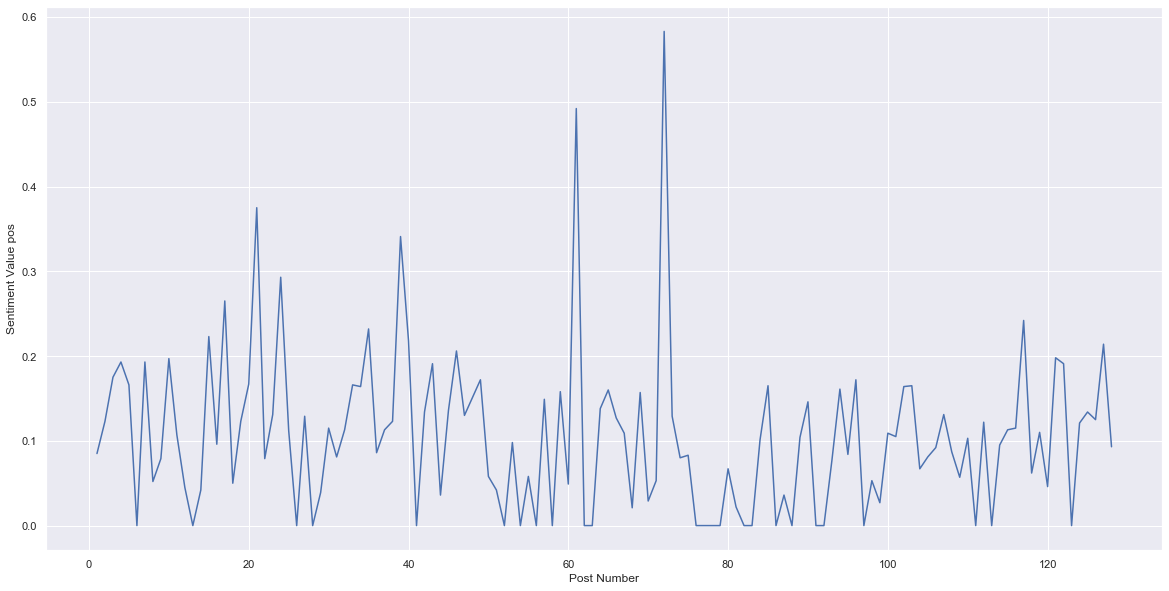

In [11]:
visualize_sentiment_evolution(sentiments, type = 'pos')

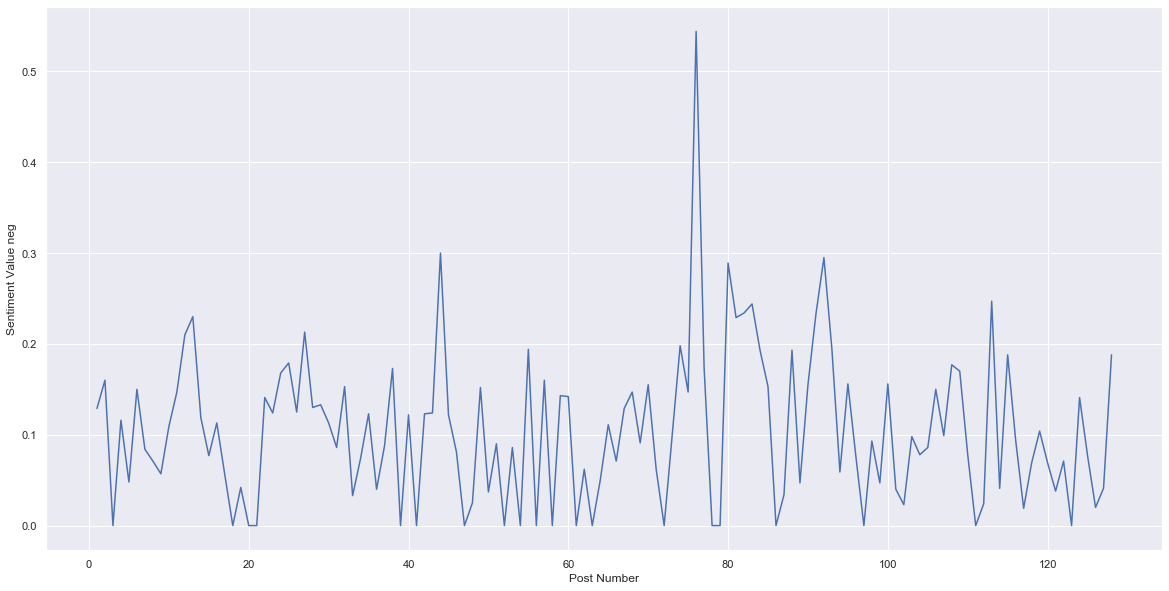

In [12]:
visualize_sentiment_evolution(sentiments, type = 'neg')